## Regression and Classification with Neural Networks

<a target="_blank" href="https://colab.research.google.com/github/AI4EPS/EPS88_PyEarth/blob/master/docs/exercises/09_neural_networks1.ipynb">
<img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

<center><img src='https://raw.githubusercontent.com/zhuwq0/images/main/1-1-ai-complete-graph.jpeg' style='width: 40%'/></center>

Created by Minh-Chien Trinh, Jeonbuk National University,

## 1.1. A Brief History

In the 1940s, NNs were conceived.

In the 1960s, the concept of backpropagation came, then people know how to train them.

In 2010, NNs started winning competitions and get much attention than before.

Since 2010, NNs have been on a meteoric rise as their magical ability to solve problems previously deemed unsolvable (i.e., image captioning, language translation, audio and video synthesis, and more).

One important milestone is the AlexNet architecture in 2012, which won the ImageNet competition.

<!-- ![](https://raw.githubusercontent.com/zhuwq0/images/main/alexnet.png) -->
<img src='https://raw.githubusercontent.com/zhuwq0/images/main/alexnet.png' style='width: 30%'/>

<!-- ![](https://raw.githubusercontent.com/zhuwq0/images/main/alexnet_score.png) -->
<img src='https://raw.githubusercontent.com/zhuwq0/images/main/alexnet_score.png' style='width: 30%'/>

The ImageNet competition is a benchmark for image classification, where the goal is to classify images into one of 1,000 categories.

<!-- ![](https://raw.githubusercontent.com/zhuwq0/images/main/imagenet.png) -->
<img src='https://raw.githubusercontent.com/zhuwq0/images/main/imagenet.png' style='width: 30%'/>

You can find more information about the AlexNet model on [Wikipedia](https://en.wikipedia.org/wiki/AlexNet). We will use the AlexNet model in the next lecture to classify images of rocks.

Currently, NNs are the primary solution to most competitions and technological challenges like self-driving cars, calculating risk, detecting fraud, early cancer detection,…

## 1.2. What is a Neural Network?

ANNs are inspired by the organic brain, translated to the computer.

ANNs have neurons, activations, and interconnectivities.

NNs are considered “black boxes” between inputs and outputs.

<center><img src='https://raw.githubusercontent.com/zhuwq0/images/main/1-8-basic-nn.png' style='width: 60%'/></center>

Each connection between neurons has a weight associated with it. Weights are multiplied by corresponding input values. These multiplications flow into the neuron and are summed before being added with a bias. Weights and biases are trainable or tunable.

$$
\begin{aligned}
output & = weight \cdot input + bias \\
y & = a \cdot x + b
\end{aligned}
$$

The formula should look very familiar to you. It is similar to the previous linear regression and classification models.

Then, an activation function is applied to the output.

$$
\begin{aligned}
output & = \sum (weight \cdot input) + bias \\
output & = activation (output)
\end{aligned}
$$

When a step function that mimics a neuron in the brain (i.e., “firing” or not, on-off switch) is used as an activation function:
- If its output is greater than 0, the neuron fires (it would output 1).
- If its output is less than 0, the neuron does not fire and would pass along a 0.

The input layer represents the actual input data (i.e., pixel values from an image, temperature, …)

- The data can be “raw”, should be preprocessed like normalization and scaling.
- The input needs to be in numeric form.

The output layer is whatever the NN returns.
- In regression, the predicted value is a scalar value, the output layer has a single neuron.
- In classification, the class of the input is predicted, the output layer has as many neurons as the training dataset has classes. But can also have a single output neuron for binary (two classes) classification.

A typical NN has thousands or even up to millions of adjustable parameters (weights and biases).

NNs act as enormous functions with vast numbers of parameters.

Finding the combination of parameter (weight and bias) values is the challenging part.

The end goal for NNs is to adjust their weights and biases (the parameters), so they produce the desired output for unseen data.

A major issue in supervised learning is overfitting, where the algorithm doesn’t understand underlying input-output dependencies, just basically “memorizes” the training data.

The goal of NN is generalization, that can be obtained when separating the data into training data and validation data.

Weights and biases are adjusted based on the error/loss presenting how “wrong” the algorithm in NN predicting the output.

NNs can be used for regression (predict a scalar, singular, value), clustering (assigned unstructured data into groups), and many other tasks.


If you want to learn more about Deep Learning (Deep Nerual Networks), you can check the [Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning) on Coursera or watch videos on [YouTube](https://youtu.be/CS4cs9xVecg?si=sULZa9qxzaqIX0M5).

In this lecture, we will use PyTorch to build and train neural networks.
The pytorch library is a powerful tool for building and training neural networks. It provides a flexible and efficient library for deep learning. It is also currently the most popular library for deep learning.

<!-- ![](https://raw.githubusercontent.com/zhuwq0/images/main/pytorch.png)
![](https://raw.githubusercontent.com/zhuwq0/images/main/tensorflow.png)
![](https://raw.githubusercontent.com/zhuwq0/images/main/jax.png) -->
<img src='https://raw.githubusercontent.com/zhuwq0/images/main/pytorch.png' style='width: 20%'/>
<img src='https://raw.githubusercontent.com/zhuwq0/images/main/tensorflow.png' style='width: 20%'/>
<img src='https://raw.githubusercontent.com/zhuwq0/images/main/jax.png' style='width: 15%'/>

Let's import the necessary libraries of PyTorch and other libraries.

In [1]:
## First part of this semester
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Second part of this semester
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Last part of this semester
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
## Set random seed for reproducibility
torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)

## Applying Neural Networks for Regression

In today's lecture, we will revisit the Betoule data and apply neural networks for regression.

If you already forgot the background of this data, please review the lecture [04 regression](https://ai4eps.github.io/EPS88_PyEarth/lectures/04_regression/#going-even-further-out-into-the-universe).

Remember the challenge of the Betoule data is that the velocity is non-linear with respect to the distance.

In the previous lecture, we used sklearn to fit the linear regression model with high polynomial degrees.

Here we will use PyTorch to fit the Betoule data and compare the results with the linear regression model.

- Load the Betoule data

In [3]:
## Load the Betoule data
# betoule_data = pd.read_csv('data/mu_z.csv',header=1) ## reading from local file
betoule_data = pd.read_csv('https://raw.githubusercontent.com/AI4EPS/EPS88_PyEarth/refs/heads/main/docs/scripts/data/mu_z.csv',header=1) ## reading from github for running on colab
betoule_data.head()

## Apply processing to convert to distance and velocity
# speed of light in km/s
c = 2.9979e8 / 1000

## the formula for v from z (and c)
betoule_data['velocity'] = c * (((betoule_data['z']+1.)**2-1.)/((betoule_data['z']+1.)**2+1.))

## convert mu to Gpc
betoule_data['distance'] = 10000*(10.**((betoule_data['mu'])/5.))*1e-9

In [4]:
## Review the data
plt.figure()
plt.scatter(
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.show()


SyntaxError: '(' was never closed (<ipython-input-4-a33faae28047>, line 3)

- Prepare the data into features (X) and target (y). This is same as the previous lecture.

In [6]:
## Define features (X) and target (y) variables using the distance as the feature and velocity as the target
X = betoule_data[['distance']].values
y = betoule_data[['velocity']].values

## Split the data into training and test sets using 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

- Let's start to build the first neural network model to fit the Betoule data.

Epoch [10/100], Loss: 0.0607
Epoch [20/100], Loss: 0.0178
Epoch [30/100], Loss: 0.0206
Epoch [40/100], Loss: 0.0087
Epoch [50/100], Loss: 0.0040
Epoch [60/100], Loss: 0.0028
Epoch [70/100], Loss: 0.0019
Epoch [80/100], Loss: 0.0012
Epoch [90/100], Loss: 0.0009
Epoch [100/100], Loss: 0.0007


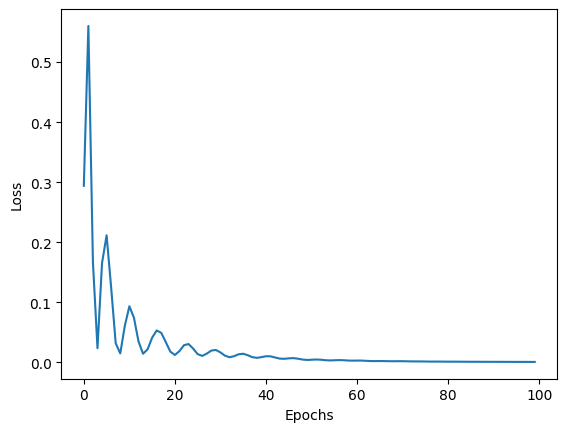

In [7]:
## Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

## Normalize the data to make the training process more efficient
magnitude_X = 10**int(np.log10(X.max()))
magnitude_y = 10**int(np.log10(y.max()))
X_train_tensor = X_train_tensor / magnitude_X
y_train_tensor = y_train_tensor / magnitude_y
X_test_tensor = X_test_tensor / magnitude_X
y_test_tensor = y_test_tensor / magnitude_y

## Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(SimpleNN, self).__init__()
        ## Define the neural network layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        ## Apply the neural network layers
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

## Define the model dimensions
input_size = X.shape[-1]
output_size = 1 # Output layer for regression (1 output neuron)
hidden_size = 16

## Define the model, loss function, and optimizer. Hint: using your defined model, MSE loss, and Adam optimizer

model = SimpleNN(input_size, output_size, hidden_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

## Define fit function
def fit(model, X, y, epochs=100):
    ## set the model to training mode
    model.train()
    losses = []
    for epoch in range(epochs):
        ## zero the gradients
        optimizer.zero_grad()

        ## get the outputs from the model
        outputs = model(X)
        ## calculate the loss
        loss = criterion(outputs, y)
        loss.backward()
        ## update the weights
        optimizer.step()

        losses.append(loss.item())
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    return losses

## Define predict function
def predict(model, X):
    ## set the model to evaluation mode
    model.eval()
    with torch.no_grad():
        ## get the outputs from the model
        outputs = model(X)
    return outputs

## Train the model
losses = fit(model, X_train_tensor, y_train_tensor, epochs=100)

## Plot the loss during the training process
plt.figure()
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


- Evaluate the model on the test set. This is same as the previous lecture.

In [8]:
## Predict on the test set
y_pred_tensor = predict(model, X_test_tensor)
y_pred = y_pred_tensor.numpy() * magnitude_y

## Calculate R-squared metric
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.4f}')

R-squared: 0.9950


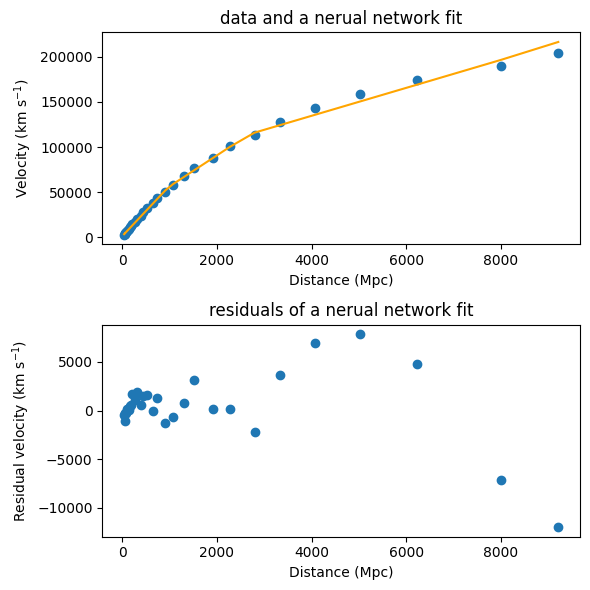

In [9]:
## Predict on the whole dataset for plotting
X_tensor = torch.tensor(X, dtype=torch.float32)
X_tensor = X_tensor / magnitude_X
y_pred_tensor = predict(model, X_tensor)
y_pred = y_pred_tensor.numpy() * magnitude_y
y_pred = y_pred.squeeze() # remove the extra dimension

## Plot the results
plt.figure(figsize=(6, 6))
plt.subplot(2,1,1)
## plot the data
plt.scatter(betoule_data['distance'],betoule_data['velocity'])
## plot the fitted line
plt.plot(betoule_data['distance'],y_pred,color='orange',)
plt.title('data and a nerual network fit')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

## plot the residuals
plt.subplot(2,1,2)
plt.scatter(betoule_data['distance'],betoule_data['velocity']-y_pred)
plt.title('residuals of a nerual network fit')
plt.ylabel('Residual velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.tight_layout()
plt.show()


- Compare the results with previous polynomial regression. How does the neural network perform?

## Applying Neural Networks for Classification

Neural networks work well for the regression tasks, how about the classification tasks?

Let's continue to apply neural networks for the binary classification task.

Again, we will re-use the basalt affinity dataset that we covered in the previous lecture.

If you already forgot the background of this data, please review the lecture [05 classification](https://ai4eps.github.io/EPS88_PyEarth/lectures/05_classification/#classifying-volcanic-rocks).

- Load the basalt affinity data

In [10]:
## Load the basalt affinity data
# basalt_data = pd.read_csv('data/Vermeesch2006.csv') ## reading from local file
basalt_data = pd.read_csv('https://raw.githubusercontent.com/AI4EPS/EPS88_PyEarth/refs/heads/main/docs/scripts/data/Vermeesch2006.csv') ## reading from github for running on colab
basalt_data.tail()

,affinity,SiO2_wt_percent,TiO2_wt_percent,Al2O3_wt_percent,Fe2O3_wt_percent,FeO_wt_percent,CaO_wt_percent,MgO_wt_percent,MnO_wt_percent,K2O_wt_percent,...,Hf_ppm,Ta_ppm,Pb_ppm,Th_ppm,U_ppm,143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb
751,IAB,50.97,0.78,18.86,NaN,NaN,10.85,4.71,0.16,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.82,15.556,38.389
752,IAB,51.00,1.41,17.06,3.80,7.04,9.97,4.96,0.17,0.73,...,NaN,NaN,NaN,NaN,NaN,NaN,0.70348,NaN,NaN,NaN
753,IAB,52.56,1.21,17.74,2.28,7.53,10.48,5.57,0.24,0.29,...,NaN,NaN,NaN,NaN,NaN,NaN,0.70362,NaN,NaN,NaN
754,IAB,52.59,1.50,16.88,2.41,7.90,10.83,4.91,0.26,0.54,...,NaN,NaN,NaN,NaN,NaN,NaN,0.70363,NaN,NaN,NaN
755,IAB,52.96,1.27,15.65,2.91,9.32,9.78,4.24,0.23,0.46,...,NaN,NaN,NaN,NaN,NaN,NaN,0.70352,NaN,NaN,NaN


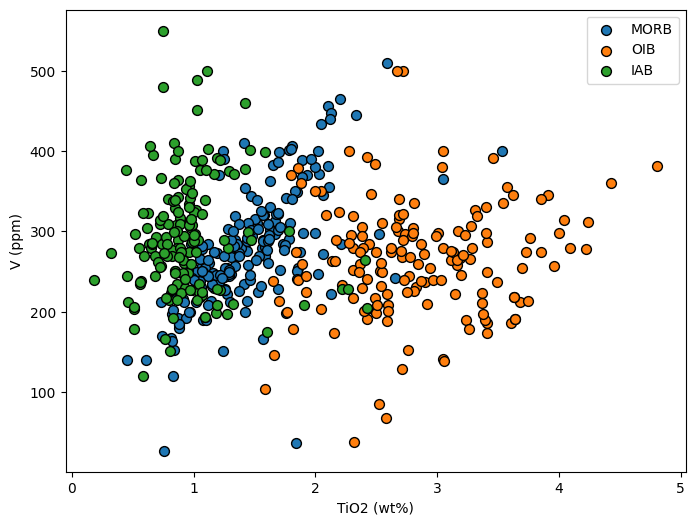

In [11]:
## Review the data
plt.figure(figsize=(8, 6))

## plot each affinity as a different color
for affinity in basalt_data['affinity'].unique():
    subset = basalt_data[basalt_data['affinity'] == affinity]
    plt.scatter(subset['TiO2_wt_percent'], subset['V_ppm'], label=affinity, edgecolor='k', s=50)

plt.legend()
plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.show()


- Prepare the data into features (X) and target (y). This is same as the previous lecture.

In [15]:
## Prepare the data into features (X) and target (y)
X = basalt_data.drop('affinity', axis=1)
y = basalt_data['affinity']

## Encode the target variable
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

## Impute missing values using median imputation
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

## Split the data into training and test sets using 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)
X_train_tensor.shape


torch.Size([21, 1])

- Let's start to build the second neural network model to fit the basalt affinity data.

Epoch [10/100], Loss: 0.1224
Epoch [20/100], Loss: 0.0299
Epoch [30/100], Loss: 0.0067
Epoch [40/100], Loss: 0.0016
Epoch [50/100], Loss: 0.0008
Epoch [60/100], Loss: 0.0005
Epoch [70/100], Loss: 0.0003
Epoch [80/100], Loss: 0.0003
Epoch [90/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0002


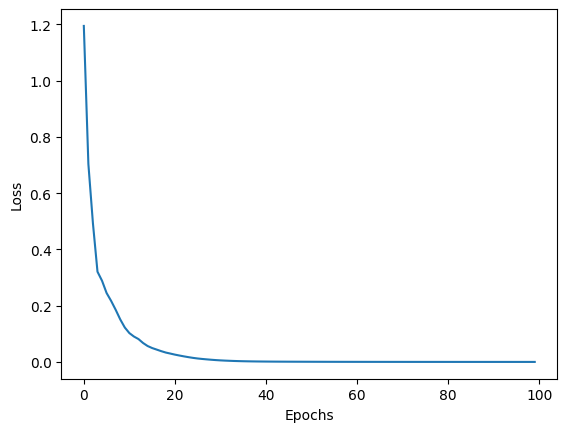

In [16]:
## Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

## Normalize the data to make the training process more efficient
mu = X_train_tensor.mean(dim=0, keepdim=True)
std = X_train_tensor.std(dim=0, keepdim=True)
X_train_tensor = (X_train_tensor - mu) / std
X_test_tensor = (X_test_tensor - mu) / std

## Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size,  output_size, hidden_size):
        super(SimpleNN, self).__init__()
        ## Define the neural network layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        ## Apply the neural network layers
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

## Initialize the model, loss function, and optimizer
input_size = X_train.shape[-1]
output_size = len(le.classes_) # Output layer for classification (number of classes)
hidden_size = 16

## Define the model, loss function, and optimizer. Hint: using your defined model, CrossEntropy loss, and Adam optimizer
model = SimpleNN(input_size, output_size, hidden_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

## Define fit function
def fit(model, X_train, y_train, epochs=100):
    ## set the model to training mode
    model.train()
    losses = []
    for epoch in range(epochs):
        ## zero the gradients
        optimizer.zero_grad()

        ## get the outputs from the model
        outputs = model(X_train)
        ## calculate the loss
        loss = criterion(outputs, y_train)
        loss.backward()
        ## update the weights
        optimizer.step()

        losses.append(loss.item())
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    return losses

## Define predict function
def predict(model, X):
    ## set the model to evaluation mode
    model.eval()
    with torch.no_grad():
        ## get the outputs from the model
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
    return predicted

## Train the model
losses = fit(model, X_train_tensor, y_train_tensor, epochs=100)

## Plot the loss
plt.figure()
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


- Evaluate the model on the test set. This is same as the previous lecture.

Accuracy: 0.9075


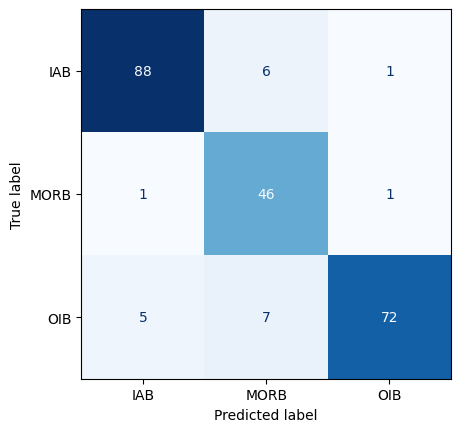

In [17]:
## Predict on the test set
y_pred_tensor = predict(model, X_test_tensor)
y_pred = y_pred_tensor.numpy()

## Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

## Confusion matrix; Hint: use confusion_matrix from sklearn.metrics
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d', colorbar=False);

- Compare the results with previous classification methods. How does the neural network perform?

- Compare the two neural networks built for the regression and classification tasks. Please list the similarities and differences.

- The neural networks we built are very simple with only one hidden layer. Do you know which variable controls the complexity of the neural networks?

- If we want to build a more complex neural network, how can we do it? Think about the number of layers and neurons in each layer.


If you are interested to build a more complex neural network, you can try the following website.

The more layers and neurons you add, the more complex the neural network becomes, it can fit more complex data, while in the meantime, it is also more challenging to train.

There are many hyperparameters you can tune in the online playgroud. Explore if we can find the parameters that can fit all the data distributions.

[Train a neural network online](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.43783&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

<!-- ![20241103200049](https://raw.githubusercontent.com/zhuwq0/images/main/20241103200049.png) -->
<img src='https://raw.githubusercontent.com/zhuwq0/images/main/20241103200049.png' style='width: 80%'/>